In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
df['Churn'].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

noticed more number of "No" than "Yes". Churn is Imbalanced

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


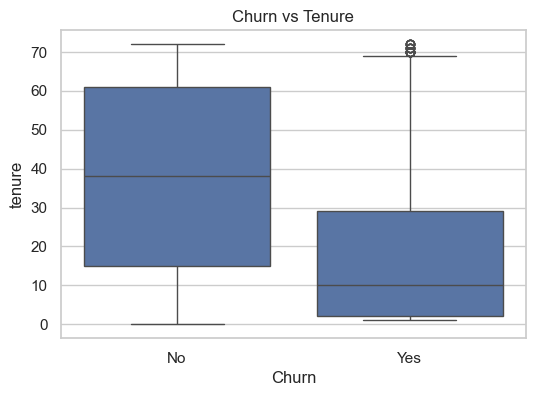

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Churn vs Tenure")
plt.show()

Churn vs Tenure

This boxplot compares customer tenure (in months) for customers who **churned** versus those who **did not churn**.

- Customers who **did not churn** generally have **much higher tenure**, with a median around 35–40 months.
- Customers who **churned** tend to leave **early**, with a median tenure of roughly 8–10 months.
- The distribution for churned customers is heavily skewed toward lower tenure values, indicating that churn is more common in the initial months of service.
- A small number of high-tenure churners appear as outliers, representing long-term customers who eventually left, possibly due to price changes or service issues.

**Insight:**  
Tenure is a strong predictor of churn. Customers are most vulnerable to leaving during their early lifecycle, making early-stage retention strategies especially important.


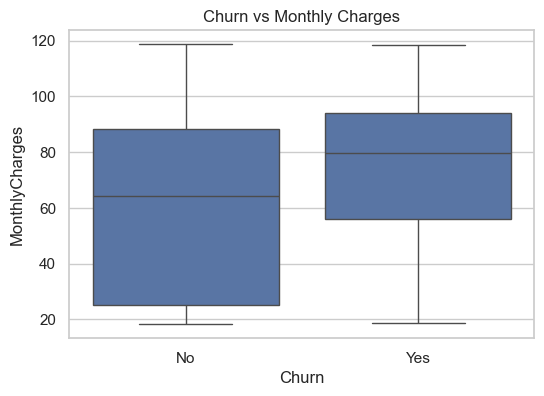

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Churn vs Monthly Charges")
plt.show()


### Churn vs Monthly Charges

This boxplot compares the distribution of monthly charges for customers who **churned** versus those who **did not churn**.

- Customers who **churned** tend to have **higher monthly charges**, with a median noticeably above that of non-churned customers.
- Non-churned customers show a wider spread toward lower monthly charges, indicating that many long-term customers are on cheaper plans.
- The upper range of monthly charges is similar for both groups, but churned customers are more concentrated in the higher-cost range.

**Insight:**  
Higher monthly charges are associated with a greater likelihood of churn. Customers paying more each month may be more price-sensitive or dissatisfied with the perceived value of the service.


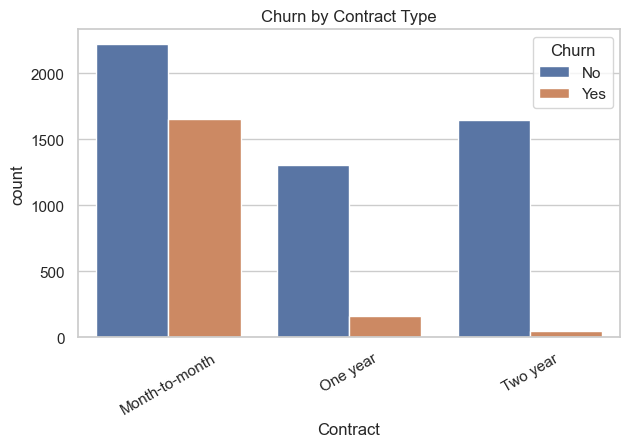

In [9]:
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=30)
plt.title("Churn by Contract Type")
plt.show()

### Churn by Contract Type

This count plot shows the number of customers who **churned** and **did not churn** across different contract types.

- Customers on **month-to-month contracts** have the **highest churn count**, with a large proportion of customers leaving compared to those who stay.
- Customers on **one-year** and **two-year contracts** show significantly **lower churn**, with very few customers leaving.
- The two-year contract group has the **lowest churn**, indicating strong customer retention for long-term commitments.

**Insight:**  
Contract type is a major driver of churn. Month-to-month contracts are much more vulnerable to churn, while longer-term contracts act as a strong retention mechanism.


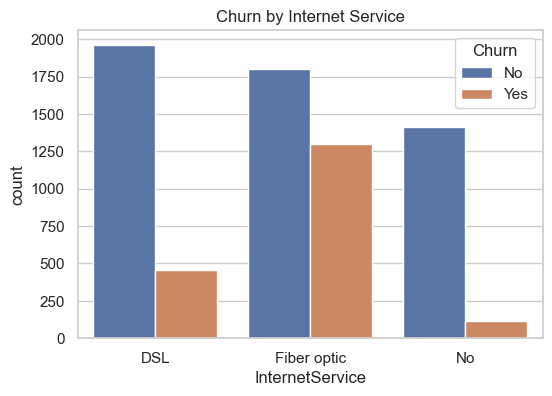

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()


### Churn by Internet Service

This count plot shows the number of customers who churned and did not churn across different internet service types.

- Customers using **fiber optic** internet show the **highest churn count**, indicating a higher likelihood of churn compared to other service types.
- **DSL** customers have lower churn levels, suggesting a more stable customer base.
- Customers with **no internet service** rarely churn, likely due to simpler and lower-cost service plans.

**Insight:**  
Internet service type plays a significant role in churn behavior. Higher-cost and higher-expectation services such as fiber optic are associated with increased churn risk.


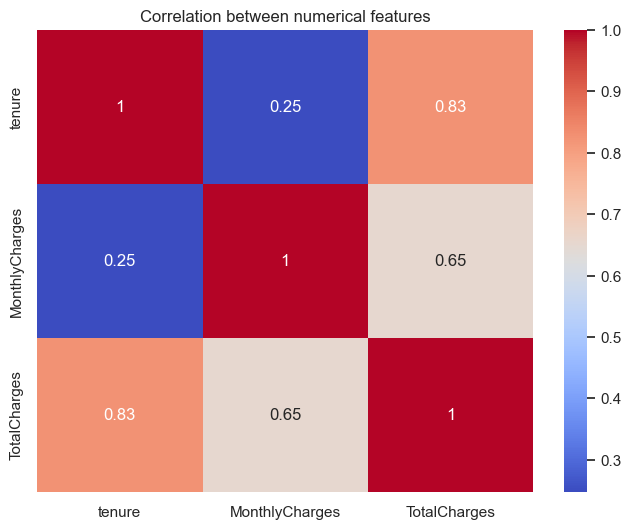

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation between numerical features")
plt.show()


### Correlation Between Numerical Features

This heatmap shows the pairwise correlation between numerical variables in the dataset.

- **Tenure and TotalCharges** have a strong positive correlation (0.83), indicating that customers who stay longer naturally accumulate higher total charges.
- **MonthlyCharges and TotalCharges** show a moderate positive correlation (0.65), as higher monthly fees contribute to higher total costs.
- **Tenure and MonthlyCharges** have a weak correlation (0.25), suggesting that how long a customer stays is largely independent of their monthly plan cost.

**Insight:**  
TotalCharges contains overlapping information with tenure. This is important to consider during modeling, especially for linear models where multicollinearity can impact coefficient interpretation.


## Exploratory Data Analysis (EDA) – Summary & Key Insights

This exploratory analysis aims to understand customer churn behavior by examining demographic, contract, service usage, and billing-related features. The insights from this section guide feature selection and preprocessing decisions for downstream machine learning models.

---

### 1. Churn vs Tenure

- Customers who **do not churn** typically have **much higher tenure**, with a median around 35–40 months.
- Customers who **churn** tend to leave **early**, often within the first year, with a median tenure of approximately 8–10 months.
- A small number of high-tenure churners appear as outliers, representing long-term customers who eventually left.

**Insight:**  
Tenure is a strong predictor of churn. Customers are most vulnerable during the early months of their lifecycle, making early retention strategies critical.

---

### 2. Churn vs Monthly Charges

- Customers who **churn** generally have **higher monthly charges** compared to those who stay.
- Non-churned customers show a wider distribution toward lower monthly charges, suggesting that lower-cost plans are associated with better retention.
- The upper range of monthly charges is similar for both churned and non-churned groups, but churned customers are more concentrated in higher-cost plans.

**Insight:**  
Higher monthly charges are associated with increased churn risk, likely due to price sensitivity or perceived lack of value.

---

### 3. Churn by Contract Type

- Customers on **month-to-month contracts** exhibit the **highest churn**, with a large proportion leaving compared to those who stay.
- Customers on **one-year** and **two-year contracts** have significantly lower churn rates.
- Two-year contracts show the **strongest retention**, with very few customers churning.

**Insight:**  
Contract type is a major driver of churn. Long-term contracts act as a strong retention mechanism, while month-to-month contracts are highly vulnerable to churn.

---

### 4. Churn by Internet Service Type

- Customers using **fiber optic** internet services show the **highest churn count**.
- **DSL** customers are more stable with lower churn.
- Customers with **no internet service** rarely churn, likely due to simpler and lower-cost service plans.

**Insight:**  
Higher-cost and higher-expectation services, such as fiber optic internet, are associated with increased churn risk.

---

### 5. Correlation Between Numerical Features

- **Tenure and TotalCharges** are strongly correlated (0.83), as total cost accumulates over time.
- **MonthlyCharges and TotalCharges** show a moderate correlation (0.65).
- **Tenure and MonthlyCharges** have a weak correlation (0.25), indicating that customer longevity is largely independent of monthly plan cost.

**Insight:**  
TotalCharges contains overlapping information with tenure. This is important to consider during modeling, particularly for linear models where multicollinearity can affect coefficient interpretation.

---

## Overall EDA Conclusions

- **Tenure**, **MonthlyCharges**, **Contract type**, and **InternetService** are strong drivers of churn.
- Customers are most likely to churn:
  - Early in their lifecycle
  - When on month-to-month contracts
  - When paying higher monthly charges
  - When subscribed to fiber optic internet services
- Numerical features are not normalized and require scaling for models sensitive to feature magnitude (e.g., logistic regression).

These insights directly inform feature engineering, preprocessing, and model selection in the next stage of the project.
